In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import keras

from model import build_model as build_model
from data import CrowdAIMappingChallenge
from evaluation import post_process_mask, binarize_mask

Using TensorFlow backend.


In [2]:
model = build_model()
model.load_weights('out/weights-63.hdf5')

VAL_IMAGES_DIRECTORY = "/home/jgoepfert/data/dlig-mapping/val/images"
VAL_ANNOTATIONS_PATH = "/home/jgoepfert/data/dlig-mapping/val/annotation.json"
VAL_ANNOTATIONS_SMALL_PATH = "/home/jgoepfert/data/dlig-mapping/val/annotation-small.json"

dataset = CrowdAIMappingChallenge(VAL_IMAGES_DIRECTORY, VAL_ANNOTATIONS_SMALL_PATH, batch_size=4, side_length=300, weigh=True)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [3]:
i_batch = 1
images, masks = dataset[i_batch]
batch_size = images.shape[0]

predictions = model.predict_on_batch(images)

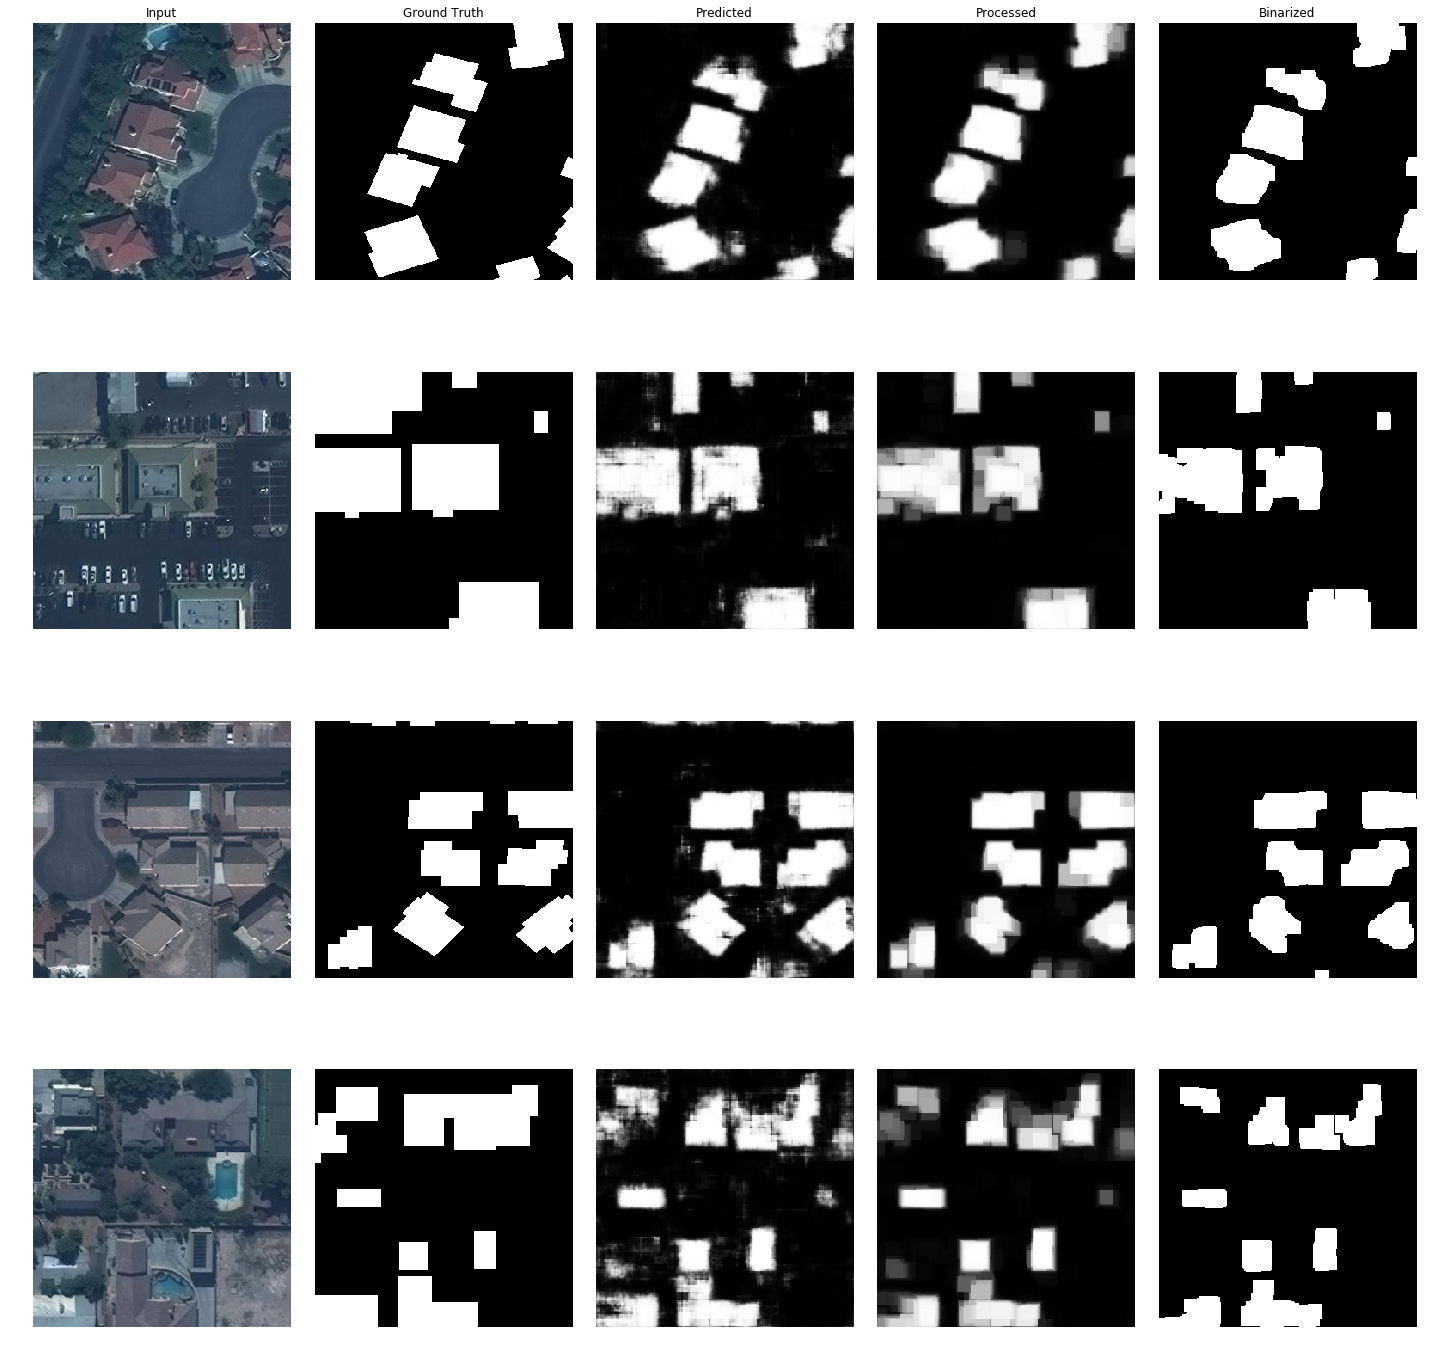

In [4]:
fig, ax = plt.subplots(batch_size, 5, squeeze=False, figsize=(4*5, batch_size * 5), sharex=True, sharey=True)
ax[0, 0].set_title('Input')
ax[0, 1].set_title('Ground Truth')
ax[0, 2].set_title('Predicted')
ax[0, 3].set_title('Processed')
ax[0, 4].set_title('Binarized')
for i in range(batch_size):
    image, mask = dataset.denormalize(images[i]), masks[i]
    truth = mask[..., 0]
    pred = predictions[i].squeeze()
    processed = post_process_mask(pred)
    binarized = binarize_mask(processed)
    ax[i, 0].imshow(image)
    ax[i, 0].axis('off')
    ax[i, 1].imshow(truth, cmap='gray')
    ax[i, 1].axis('off')
    ax[i, 2].imshow(pred, cmap='gray')
    ax[i, 2].axis('off')
    ax[i, 3].imshow(processed, cmap='gray')
    ax[i, 3].axis('off')
    ax[i, 4].imshow(binarized, cmap='gray')
    ax[i, 4].axis('off')
fig.tight_layout()
plt.show()